In [3]:
!pip install pyspark
!pip install findspark

In [4]:
from pyspark.sql import SparkSession
import findspark
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.functions import *
from pyspark.sql.types import *

findspark.init()

spark = SparkSession.builder.appName("Pyspark")\
                            .config("spark.memory.offHeap.enable","true")\
                            .config("spark.memory.offHeap.size","10g")\
                            .getOrCreate()

spark

In [5]:
!curl https://raw.githubusercontent.com/pedro-augusto-21/BigData/main/portugal_ads_proprieties.csv >> portugal_ads_proprieties.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 77 11.1M   77 8770k    0     0  9813k      0  0:00:01 --:--:--  0:00:01 9821k
100 11.1M  100 11.1M    0     0   9.8M      0  0:00:01  0:00:01 --:--:--  9.9M


In [6]:
#Lemos o ficheiro excel 
df = spark.read.csv("portugal_ads_proprieties.csv",header=True,sep=",")

In [4]:
#Tratamento de erros, eliminamos todas as rows com nulls
df = df.dropna()
df.printSchema()

root
 |-- Location: string (nullable = true)
 |-- Rooms: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Area: string (nullable = true)
 |-- Bathrooms: string (nullable = true)
 |-- Condition: string (nullable = true)
 |-- AdsType: string (nullable = true)
 |-- ProprietyType: string (nullable = true)



In [5]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType,BooleanType,DateType
df = df.withColumn("Rooms",col("Rooms").cast(IntegerType())) \
    .withColumn("Price",col("Price").cast(IntegerType())) \
    .withColumn("Area",col("Area").cast(IntegerType())) \
    .withColumn("Bathrooms",col("Bathrooms").cast(IntegerType()))
df.printSchema()

root
 |-- Location: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Area: integer (nullable = true)
 |-- Bathrooms: integer (nullable = true)
 |-- Condition: string (nullable = true)
 |-- AdsType: string (nullable = true)
 |-- ProprietyType: string (nullable = true)



In [6]:
df.show(5,0)

+----------------------------------+-----+-----+----+---------+---------+-------+-------------+
|Location                          |Rooms|Price|Area|Bathrooms|Condition|AdsType|ProprietyType|
+----------------------------------+-----+-----+----+---------+---------+-------+-------------+
| Espinho, Aveiro                  |3    |1000 |125 |3        |Used     |Rent   |Apartament   |
| Válega, Ovar, Aveiro             |3    |750  |138 |2        |New      |Rent   |Apartament   |
| Gafanha da Nazaré, Ílhavo, Aveiro|1    |450  |32  |2        |New      |Rent   |Apartament   |
| Esmoriz, Ovar, Aveiro            |3    |1300 |129 |3        |Used     |Rent   |Apartament   |
| Esmoriz, Ovar, Aveiro            |3    |1300 |153 |3        |Renovated|Rent   |Apartament   |
+----------------------------------+-----+-----+----+---------+---------+-------+-------------+
only showing top 5 rows



In [7]:
#Contamos o número de linhas do dataset
df.count()

93806

In [8]:
#Contamos o número de Localizações diferentes no dataset
df.select('Location').distinct().count()

2431

In [9]:
#Usamos as áreas das casas para contar o número de casas por Location e apresentamos de forma descendente
df.groupBy('Location').agg(count('Area').alias('House_count')).orderBy(desc('House_count')).show()

+--------------------+-----------+
|            Location|House_count|
+--------------------+-----------+
| Cedofeita, Santo...|       1875|
| Matosinhos e Leç...|       1635|
|     Paranhos, Porto|       1577|
| Montijo e Afonso...|       1396|
| Albufeira e Olho...|       1319|
| Canidelo, Vila N...|       1305|
| Santa Marinha e ...|       1274|
| Cascais e Estori...|       1196|
| Glória e Vera Cr...|       1108|
| Quarteira, Loulé...|       1079|
| Mafamude e Vilar...|        983|
|      Ramalde, Porto|        959|
|      Portimão, Faro|        896|
| Castelo (Sesimbr...|        755|
| São Gonçalo de L...|        736|
| Póvoa de Varzim,...|        725|
| Fernão Ferro, Se...|        693|
| Ermesinde, Valon...|        656|
|       Bonfim, Porto|        628|
| São Martinho, Fu...|        608|
+--------------------+-----------+
only showing top 20 rows



In [10]:
#Split da coluna Location 
split_cols = pyspark.sql.functions.split(df['Location'], ',')

#Adiciona as colunas Perish e County, eliminamos a coluna Location
df1 = df.withColumn('Perish', split_cols.getItem(0)) \
    .withColumn('County', split_cols.getItem(1)).drop('Location')

In [11]:
#Mostrar o dataset com as alterações
df1.show()

+-----+-----+----+---------+---------+-------+-------------+--------------------+----------+
|Rooms|Price|Area|Bathrooms|Condition|AdsType|ProprietyType|              Perish|    County|
+-----+-----+----+---------+---------+-------+-------------+--------------------+----------+
|    3| 1000| 125|        3|     Used|   Rent|   Apartament|             Espinho|    Aveiro|
|    3|  750| 138|        2|      New|   Rent|   Apartament|              Válega|      Ovar|
|    1|  450|  32|        2|      New|   Rent|   Apartament|   Gafanha da Nazaré|    Ílhavo|
|    3| 1300| 129|        3|     Used|   Rent|   Apartament|             Esmoriz|      Ovar|
|    3| 1300| 153|        3|Renovated|   Rent|   Apartament|             Esmoriz|      Ovar|
|    2|  850|  88|        2|Renovated|   Rent|   Apartament|            Esgueira|    Aveiro|
|    2|  625|  90|        2|     Used|   Rent|   Apartament| Santa Maria da F...|  Travanca|
|    2|  825|  77|        2|      New|   Rent|   Apartament|          

In [12]:
#Contamos quantos County existem
df1.select('County').distinct().count()

459

In [13]:
#Mostramos o número de casa de uma forma mais clara
df1.groupBy('County').agg(count('Area').alias('House_count')).orderBy(desc('House_count')).show()

+------------------+-----------+
|            County|House_count|
+------------------+-----------+
|            Lisboa|       8653|
| Vila Nova de Gaia|       5521|
|             Porto|       5126|
|              Faro|       2808|
|            Aveiro|       2509|
|           Cascais|       2334|
|            Sintra|       2179|
|        Matosinhos|       2061|
|   Santo Ildefonso|       1875|
|           Setúbal|       1824|
|            Seixal|       1673|
|             Loulé|       1633|
|          Sesimbra|       1580|
|         Albufeira|       1573|
|           Montijo|       1485|
|              Maia|       1481|
|             Braga|       1374|
|           Funchal|       1185|
|           Amadora|       1151|
|          Gondomar|       1121|
+------------------+-----------+
only showing top 20 rows



In [14]:
#Organizar o dataset por county em relação ao preço
df_price = df1.select('County','Price').orderBy(desc('Price')).show()

+--------------------+---------+
|              County|    Price|
+--------------------+---------+
| Vila Nova de Fam...|285000000|
|              Lisboa|190658610|
|              Lisboa|190658610|
|              Lisboa|168689950|
|              Lisboa|164689950|
|              Lisboa|140645234|
|              Lisboa|138435353|
|              Lisboa|137896713|
|            Bragança|123556750|
|              Lisboa|122716281|
|              Lisboa|118545045|
|              Lisboa|112955157|
|              Lisboa| 91770455|
|              Lisboa| 91410042|
|              Lisboa| 84389760|
|              Lisboa| 83661332|
|              Lisboa| 80092440|
|              Lisboa| 77371568|
|              Lisboa| 74687445|
|              Lisboa| 73764893|
+--------------------+---------+
only showing top 20 rows



In [15]:
#Colocamos a área também
df_price = df1.select('County','Price','Area').orderBy(desc('Price')).show()

+--------------------+---------+----+
|              County|    Price|Area|
+--------------------+---------+----+
| Vila Nova de Fam...|285000000| 441|
|              Lisboa|190658610| 162|
|              Lisboa|190658610| 162|
|              Lisboa|168689950| 185|
|              Lisboa|164689950| 185|
|              Lisboa|140645234| 126|
|              Lisboa|138435353| 123|
|              Lisboa|137896713| 120|
|            Bragança|123556750| 100|
|              Lisboa|122716281| 104|
|              Lisboa|118545045| 104|
|              Lisboa|112955157| 110|
|              Lisboa| 91770455|  96|
|              Lisboa| 91410042|  95|
|              Lisboa| 84389760|  68|
|              Lisboa| 83661332|  85|
|              Lisboa| 80092440|  68|
|              Lisboa| 77371568|  81|
|              Lisboa| 74687445|  76|
|              Lisboa| 73764893|  74|
+--------------------+---------+----+
only showing top 20 rows



In [16]:
#Criamos uma coluna de Rooms Totais que é a soma dos Rooms mais as Bathrooms e fazemos a média o preço por divisão por Concelho
df1 = df1.withColumn('TotalRooms', df1.Rooms + df1.Bathrooms) 

room_price = df1.withColumn("RoomPrice", df1.Price / df1.TotalRooms)
room_price = room_price.groupBy("County").mean("RoomPrice")


room_price.show()

df2 = df1.join(room_price,on='County',how='inner')
df2.printSchema()

+--------------------+------------------+
|              County|    avg(RoomPrice)|
+--------------------+------------------+
|          Matosinhos|101673.71423869426|
|     Aguiar da Beira|21070.194003527336|
|              Oeiras|104075.51592945983|
|             Montijo| 72795.03349067195|
| Santa Cruz e São...| 53061.33219954648|
| Vila Velha de Rodão|12694.583333333332|
|           Estarreja|43751.388578869046|
|             Batalha| 33195.72072072072|
|            Lourinhã| 69144.14912038315|
|     Câmara de Lobos|60568.824404761916|
|            Mealhada| 33261.28271128271|
|      Ameal e Arzila| 27774.50980392157|
|             Tondela| 21977.31922398589|
|            Penafiel| 43729.10962931931|
|     Cova da Piedade|57976.604497354434|
|              Anadia| 26088.79144282759|
| Cristelo Covo e ...| 37707.53968253968|
|               Trofa| 51484.20428416341|
| Nossa Senhora da...|13004.780505952382|
|   Vale e Vila Maior|48890.029761904756|
+--------------------+------------

In [17]:
#Preço por média da área por Concelho 
area_price = df2.withColumn('AreaPrice', df2.Price / df2.Area)
area_price = area_price.groupBy('County').mean('AreaPrice')

area_price.show()

df3 = df2.join(area_price,on='County',how='inner')
df3.printSchema()

+--------------------+------------------+
|              County|    avg(AreaPrice)|
+--------------------+------------------+
|          Matosinhos|3948.7979717840785|
|     Aguiar da Beira| 765.8850431199836|
|              Oeiras| 5840.673300492195|
|             Montijo|2545.6494372053594|
| Santa Cruz e São...|2439.5103215384297|
| Vila Velha de Rodão|  617.838030929693|
|           Estarreja| 1565.131212321675|
|             Batalha|1072.0271660561484|
|            Lourinhã|3336.1173661567022|
|     Câmara de Lobos| 1632.424658912842|
|            Mealhada| 907.7479711008058|
|      Ameal e Arzila|1269.7216179812303|
|             Tondela| 689.6714967646462|
|            Penafiel|1241.1012128298557|
|     Cova da Piedade|2707.6459615369135|
|              Anadia|2431.3835623260197|
| Cristelo Covo e ...|1213.2934222307595|
|               Trofa|1544.2215969618605|
| Nossa Senhora da...| 496.7207486429944|
|   Vale e Vila Maior| 1353.274579822306|
+--------------------+------------

In [18]:
#Preço médio de casa de banho por Concelho 
bathrooms_price = df1.withColumn('BathroomsValue',col("Bathrooms") / col("Price"))
bathrooms_price = bathrooms_price.groupBy('County').mean('BathroomsValue')

bathrooms_price.show()

df4 = df3.join(bathrooms_price,on='County',how='inner')
df4.printSchema()

+--------------------+--------------------+
|              County| avg(BathroomsValue)|
+--------------------+--------------------+
|          Matosinhos|3.034229067775083E-5|
|     Aguiar da Beira|1.860759158243392...|
|              Oeiras|3.943759190593265E-5|
|             Montijo|2.049763741372315...|
| Santa Cruz e São...|9.645632852887685E-5|
| Vila Velha de Rodão|2.774414371223929...|
|           Estarreja|4.556707502174853E-5|
|             Batalha|1.629030233666758...|
|            Lourinhã|1.052622483298463...|
|     Câmara de Lobos|9.330675600688387E-6|
|            Mealhada|1.799161043699414...|
|      Ameal e Arzila|1.986418327199794E-5|
|             Tondela| 1.38683744663186E-4|
|            Penafiel|1.247148993298064E-4|
|     Cova da Piedade|8.435788303604506E-5|
|              Anadia|3.448955355583492E-5|
| Cristelo Covo e ...| 6.73716526812958E-5|
|               Trofa|1.758743000972312E-5|
| Nossa Senhora da...|3.054200484165672E-5|
|   Vale e Vila Maior|9.79982710

In [19]:
df_final = df4.select('County','avg(RoomPrice)','avg(AreaPrice)','avg(BathroomsValue)').distinct()
df_final.show(5,0)

+-------------------------------------+------------------+------------------+---------------------+
|County                               |avg(RoomPrice)    |avg(AreaPrice)    |avg(BathroomsValue)  |
+-------------------------------------+------------------+------------------+---------------------+
| Matosinhos                          |101673.71423869426|3948.7979717840785|3.034229067775083E-5 |
| Aguiar da Beira                     |21070.194003527336|765.8850431199836 |1.8607591582433922E-5|
| Oeiras                              |104075.51592945983|5840.673300492195 |3.943759190593265E-5 |
| Montijo                             |72795.03349067195 |2545.6494372053594|2.0497637413723153E-5|
| Santa Cruz e São Bartolomeu da Serra|53061.33219954648 |2439.5103215384297|9.645632852887685E-5 |
+-------------------------------------+------------------+------------------+---------------------+
only showing top 5 rows



In [20]:
###### K MEANS ######
#Treinamos a data com as nossas features
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assemble=VectorAssembler(inputCols=[
    'avg(AreaPrice)','avg(RoomPrice)','avg(BathroomsValue)'
], outputCol='features')

assembled_data=assemble.transform(df_final)

scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

data_scale_output.select('standardized').show(2,truncate=False)

+------------------------------------------------------------+
|standardized                                                |
+------------------------------------------------------------+
|[1.5605079550199226,3.115733955183846,0.051247572309285755] |
|[0.3026667129996346,0.6456842792718288,0.031427880816581974]|
+------------------------------------------------------------+
only showing top 2 rows



In [21]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    output=KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost

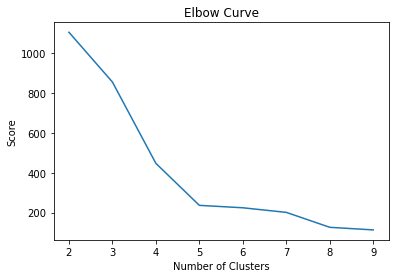

In [22]:
import pandas as pd
import pylab as pl
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2,10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [23]:
KMeans_algo=KMeans(featuresCol='standardized', k=4)
KMeans_fit=KMeans_algo.fit(data_scale_output)

In [24]:
preds=KMeans_fit.transform(data_scale_output)

preds.show(5,0)

+-------------------------------------+------------------+------------------+---------------------+------------------------------------------------------------+------------------------------------------------------------+----------+
|County                               |avg(RoomPrice)    |avg(AreaPrice)    |avg(BathroomsValue)  |features                                                    |standardized                                                |prediction|
+-------------------------------------+------------------+------------------+---------------------+------------------------------------------------------------+------------------------------------------------------------+----------+
| Matosinhos                          |101673.71423869426|3948.7979717840785|3.034229067775083E-5 |[3948.7979717840785,101673.71423869426,3.034229067775083E-5]|[1.5605079550199226,3.115733955183846,0.051247572309285755] |0         |
| Aguiar da Beira                     |21070.194003527336|765.885043

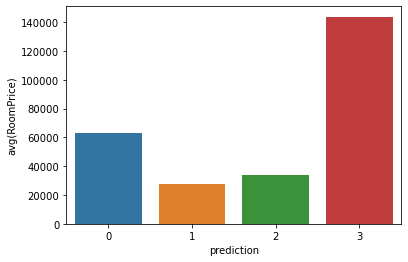

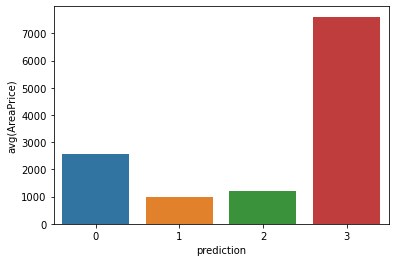

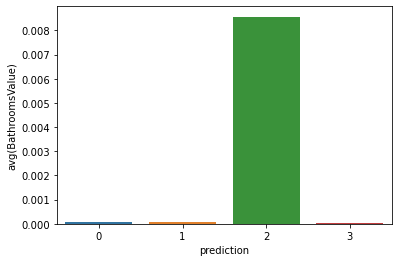

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select('avg(RoomPrice)','avg(AreaPrice)','avg(BathroomsValue)','prediction')
df_viz = df_viz.toPandas()
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()

list1 = ['avg(RoomPrice)','avg(AreaPrice)','avg(BathroomsValue)']

for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()

In [26]:
#### REGRESSÃO LOGISTICA ####
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StandardScaler

In [27]:
spark = SparkSession.builder.appName("Price").getOrCreate()

In [28]:
#preparamos o dataset para a regressão logistica
df5 = df1
df5 = df5.drop('Perish', 'TotalRooms')
df5.show(5,0)
df5 = df5.dropna()
df5.printSchema()

+-----+-----+----+---------+---------+-------+-------------+-------+
|Rooms|Price|Area|Bathrooms|Condition|AdsType|ProprietyType|County |
+-----+-----+----+---------+---------+-------+-------------+-------+
|3    |1000 |125 |3        |Used     |Rent   |Apartament   | Aveiro|
|3    |750  |138 |2        |New      |Rent   |Apartament   | Ovar  |
|1    |450  |32  |2        |New      |Rent   |Apartament   | Ílhavo|
|3    |1300 |129 |3        |Used     |Rent   |Apartament   | Ovar  |
|3    |1300 |153 |3        |Renovated|Rent   |Apartament   | Ovar  |
+-----+-----+----+---------+---------+-------+-------------+-------+
only showing top 5 rows

root
 |-- Rooms: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Area: integer (nullable = true)
 |-- Bathrooms: integer (nullable = true)
 |-- Condition: string (nullable = true)
 |-- AdsType: string (nullable = true)
 |-- ProprietyType: string (nullable = true)
 |-- County: string (nullable = true)



In [29]:
#import do StringIndexer
from pyspark.ml.feature import StringIndexer

In [30]:
#Usamos o stringIndexer para alterar os valores string para int, para os podermos utilizar para a regressão logistica
condition_indexer = StringIndexer(inputCol="Condition", outputCol="conditionIndex")
df5 = condition_indexer.fit(df5).transform(df5)
df5 = df5.drop('Condition')

adsType_indexer = StringIndexer(inputCol="AdsType", outputCol="adsTypeIndex")
df5 = adsType_indexer.fit(df5).transform(df5)
df5 = df5.drop('AdsType')

proprietyType_indexer = StringIndexer(inputCol="ProprietyType", outputCol="proprietyTypeIndex")
df5 = proprietyType_indexer.fit(df5).transform(df5)
df5 = df5.drop('ProprietyType')

county_indexer = StringIndexer(inputCol="County", outputCol="countyIndex")
df5 = county_indexer.fit(df5).transform(df5)
df5 = df5.drop('County')
df5.show(5,0)

+-----+-----+----+---------+--------------+------------+------------------+-----------+
|Rooms|Price|Area|Bathrooms|conditionIndex|adsTypeIndex|proprietyTypeIndex|countyIndex|
+-----+-----+----+---------+--------------+------------+------------------+-----------+
|3    |1000 |125 |3        |0.0           |1.0         |0.0               |4.0        |
|3    |750  |138 |2        |1.0           |1.0         |0.0               |104.0      |
|1    |450  |32  |2        |1.0           |1.0         |0.0               |25.0       |
|3    |1300 |129 |3        |0.0           |1.0         |0.0               |104.0      |
|3    |1300 |153 |3        |3.0           |1.0         |0.0               |104.0      |
+-----+-----+----+---------+--------------+------------+------------------+-----------+
only showing top 5 rows



In [31]:
#dividimos em clusters o preço para a regressão logistica poder prever o preço
df6 = df5
df6 = df6.withColumn("Price", when(col("Price")<4999, 0).when(col("Price")<99999, 1).when(col("Price")<499999, 2).otherwise(3))
df6.show(5,0)

+-----+-----+----+---------+--------------+------------+------------------+-----------+
|Rooms|Price|Area|Bathrooms|conditionIndex|adsTypeIndex|proprietyTypeIndex|countyIndex|
+-----+-----+----+---------+--------------+------------+------------------+-----------+
|3    |0    |125 |3        |0.0           |1.0         |0.0               |4.0        |
|3    |0    |138 |2        |1.0           |1.0         |0.0               |104.0      |
|1    |0    |32  |2        |1.0           |1.0         |0.0               |25.0       |
|3    |0    |129 |3        |0.0           |1.0         |0.0               |104.0      |
|3    |0    |153 |3        |3.0           |1.0         |0.0               |104.0      |
+-----+-----+----+---------+--------------+------------+------------------+-----------+
only showing top 5 rows



In [32]:
#fazemos o vetor para a regressão logistica
assembler = VectorAssembler(inputCols = ['Rooms','Area', 'Bathrooms', 'conditionIndex', 'adsTypeIndex', 'proprietyTypeIndex', 'countyIndex'], outputCol='features')
output = assembler.transform(df6)
output.show(5,0)

+-----+-----+----+---------+--------------+------------+------------------+-----------+---------------------------------+
|Rooms|Price|Area|Bathrooms|conditionIndex|adsTypeIndex|proprietyTypeIndex|countyIndex|features                         |
+-----+-----+----+---------+--------------+------------+------------------+-----------+---------------------------------+
|3    |0    |125 |3        |0.0           |1.0         |0.0               |4.0        |[3.0,125.0,3.0,0.0,1.0,0.0,4.0]  |
|3    |0    |138 |2        |1.0           |1.0         |0.0               |104.0      |[3.0,138.0,2.0,1.0,1.0,0.0,104.0]|
|1    |0    |32  |2        |1.0           |1.0         |0.0               |25.0       |[1.0,32.0,2.0,1.0,1.0,0.0,25.0]  |
|3    |0    |129 |3        |0.0           |1.0         |0.0               |104.0      |[3.0,129.0,3.0,0.0,1.0,0.0,104.0]|
|3    |0    |153 |3        |3.0           |1.0         |0.0               |104.0      |[3.0,153.0,3.0,3.0,1.0,0.0,104.0]|
+-----+-----+----+------

In [33]:
#standarizamos 
scale=StandardScaler(inputCol='features',outputCol='standardized')
scale=scale.fit(output)
scale_output= scale.transform(output)

scale_output.select('standardized').show(2,truncate=False)

+----------------------------------------------------------------------------------------------------------------------+
|standardized                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[2.4182330926992543,0.004114256752554829,3.0104570105450694,0.0,5.533056486030905,0.0,0.06428014838597373]            |
|[2.4182330926992543,0.004542139454820531,2.0069713403633798,0.818081836323632,5.533056486030905,0.0,1.671283858035317]|
+----------------------------------------------------------------------------------------------------------------------+
only showing top 2 rows



In [34]:
#dataframe final
finalised_data = scale_output.select("features", "Price")
finalised_data.show(5,0)

+---------------------------------+-----+
|features                         |Price|
+---------------------------------+-----+
|[3.0,125.0,3.0,0.0,1.0,0.0,4.0]  |0    |
|[3.0,138.0,2.0,1.0,1.0,0.0,104.0]|0    |
|[1.0,32.0,2.0,1.0,1.0,0.0,25.0]  |0    |
|[3.0,129.0,3.0,0.0,1.0,0.0,104.0]|0    |
|[3.0,153.0,3.0,3.0,1.0,0.0,104.0]|0    |
+---------------------------------+-----+
only showing top 5 rows



In [35]:
#treinamos a data em 80% e a data de teste é 20%
train, test = finalised_data.randomSplit([0.8, 0.2])

In [36]:
#aplicamos o modelo
lr = LogisticRegression(featuresCol='features',labelCol='Price')
lrn = lr.fit(train)
predictions=lrn.transform(test)

In [37]:
#mostramos os resultados
lrn_summary = lrn.summary
lrn_summary.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|Price|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(7,[0,1,2],[1.0,2...|  2.0|[-2.4775103985347...|[0.00392309220746...|       2.0|
|(7,[0,1,2],[1.0,2...|  2.0|[-2.4775103985347...|[0.00392309220746...|       2.0|
|(7,[0,1,2],[1.0,2...|  2.0|[-2.4772708846905...|[0.00392319430279...|       2.0|
|(7,[0,1,2],[1.0,2...|  2.0|[-2.4765523431578...|[0.00392350004719...|       2.0|
|(7,[0,1,2],[1.0,2...|  2.0|[-2.4765523431578...|[0.00392350004719...|       2.0|
|(7,[0,1,2],[1.0,3...|  2.0|[-2.4763128293135...|[0.00392360178171...|       2.0|
|(7,[0,1,2],[1.0,3...|  2.0|[-2.4763128293135...|[0.00392360178171...|       2.0|
|(7,[0,1,2],[1.0,3...|  2.0|[-2.4763128293135...|[0.00392360178171...|       2.0|
|(7,[0,1,2],[1.0,3...|  2.0|[-2.4763128293135...|[0.00392360178171...|       2.0|
|(7,[0,1,2],[1.0

In [38]:
lrn_summary.predictions.describe().show(5)

+-------+------------------+------------------+
|summary|             Price|        prediction|
+-------+------------------+------------------+
|  count|             74359|             74359|
|   mean| 2.124194784760419|2.0500948103121344|
| stddev|0.5944060528570189|0.4824078685279478|
|    min|               0.0|               0.0|
|    max|               3.0|               3.0|
+-------+------------------+------------------+



In [39]:
#taxa de previsão do modelo
eval = BinaryClassificationEvaluator(rawPredictionCol = "prediction", labelCol = "Price")
auc = eval.evaluate(predictions)
print(auc)

0.9667908755911154


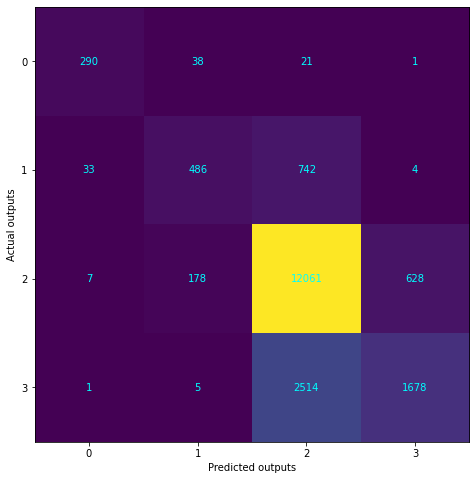

In [40]:
#fazemos a matrix confusão
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y_test = predictions.select("Price")
y_test = y_test.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(4))
ax.yaxis.set(ticks=range(4))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='cyan')
plt.show()